# Predicting the Sales Price of Cars through Linear Regression Model

## 1. Preprocessing

### 1.1 Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
sns.set()

### 1.2 Importing data

In [2]:
data = pd.read_csv('C:/Users/HP/Downloads/1.04.+Real-life+example (1).csv')
data.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### 1.3 Handling Missing values

In [3]:
data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [4]:
num = data['Price'].isna().sum()
percentage = num / len(data)
print('Percentage of data with null values in price : {0}'.format(percentage)) # 0.0395
# The rule of thumb is if the % of missing values is less than 5% we can drop it 

num = data['EngineV'].isna().sum()
percentage = num / len(data)
print('Percentage of data with null values in engine volume: {0}'.format(percentage))# 0.0345

Percentage of data with null values in price : 0.03958573072497123
Percentage of data with null values in engine volume: 0.03452243958573072


In [5]:
data.dropna( inplace = True)

In [6]:
data.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

### 1.3 Checking for any inconsistent data type

In [7]:
data.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

### 1.4 Encoding categorical variables


In [8]:
categorical_columns = ['Brand', 'Body', 'Engine Type', 'Registration', 'Model']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data_encoded

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,1991,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7900.0,427,2.9,1999,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,13300.0,358,5.0,2003,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,23000.0,240,4.2,2007,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,18300.0,120,2.0,2011,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,17900.0,35,1.6,2014,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4340,125000.0,9,3.0,2014,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4341,6500.0,1,3.5,1999,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4342,8000.0,194,2.0,1985,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
col_to_encode = [ 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_21', 'Model_210',
       'Model_220', 'Model_230', 'Model_25', 'Model_250', 'Model_300',
       'Model_316', 'Model_318', 'Model_320', 'Model_323', 'Model_324',
       'Model_325', 'Model_328', 'Model_330', 'Model_335',
       'Model_4 Series Gran Coupe', 'Model_428', 'Model_4Runner',
       'Model_5', 'Model_5 Series', 'Model_5 Series GT', 'Model_520',
       'Model_523', 'Model_524', 'Model_525', 'Model_528', 'Model_530',
       'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_GLS 500', 'Model_GLS 63',
       'Model_Galant', 'Model_Golf GTI', 'Model_Golf II',
       'Model_Golf III', 'Model_Golf IV', 'Model_Golf Plus',
       'Model_Golf V', 'Model_Golf VI', 'Model_Golf VII',
       'Model_Golf Variant', 'Model_Grand Scenic', 'Model_Grandis',
       'Model_Hiace', 'Model_Highlander', 'Model_Hilux', 'Model_I3',
       'Model_IQ', 'Model_Jetta', 'Model_Kangoo', 'Model_Koleos',
       'Model_L 200', 'Model_LT', 'Model_Laguna', 'Model_Lancer',
       'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Lite Ace',
       'Model_Logan', 'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB',
       'Model_ML 250', 'Model_ML 270', 'Model_ML 280', 'Model_ML 320',
       'Model_ML 350', 'Model_ML 400', 'Model_ML 430', 'Model_ML 500',
       'Model_ML 550', 'Model_ML 63 AMG', 'Model_Mark II', 'Model_Master',
       'Model_Matrix', 'Model_Megane', 'Model_Modus', 'Model_Multivan',
       'Model_New Beetle', 'Model_Outlander', 'Model_Outlander XL',
       'Model_Pajero', 'Model_Pajero Pinin', 'Model_Pajero Sport',
       'Model_Pajero Wagon', 'Model_Passat B2', 'Model_Passat B3',
       'Model_Passat B4', 'Model_Passat B5', 'Model_Passat B6',
       'Model_Passat B7', 'Model_Passat B8', 'Model_Passat CC',
       'Model_Phaeton', 'Model_Pointer', 'Model_Polo', 'Model_Previa',
       'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7', 'Model_R 320',
       'Model_R8', 'Model_Rav 4', 'Model_S 140', 'Model_S 250',
       'Model_S 280', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 420', 'Model_S 430', 'Model_S 500',
       'Model_S 55', 'Model_S 550', 'Model_S 600', 'Model_S 63 AMG',
       'Model_S 65 AMG', 'Model_S-Guard', 'Model_S4', 'Model_S5',
       'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter', 'Model_Sprinter 208', 'Model_Sprinter 210',
       'Model_Sprinter 211', 'Model_Sprinter 212', 'Model_Sprinter 213',
       'Model_Sprinter 311', 'Model_Sprinter 312', 'Model_Sprinter 313',
       'Model_Sprinter 315', 'Model_Sprinter 316', 'Model_Sprinter 318',
       'Model_Sprinter 319', 'Model_Sprinter 324', 'Model_Symbol',
       'Model_Syncro', 'Model_T2 (Transporter)', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
       'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
       'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
       'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']
data_encoded[col_to_encode] = data_encoded[col_to_encode].applymap(lambda x: 1 if x else 0)

In [10]:
data_encoded

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,1991,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.0,427,2.9,1999,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.0,358,5.0,2003,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23000.0,240,4.2,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.0,120,2.0,2011,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,17900.0,35,1.6,2014,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4340,125000.0,9,3.0,2014,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4341,6500.0,1,3.5,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4342,8000.0,194,2.0,1985,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'], dtype=object)

## 2. Exploratory Data Analysis (EDA)

### 2.1 Checking unique values

In [12]:
data_scaled = data_encoded

### 2.2 Target Variable analysis
Check for skewness in the distribution

C:\Users\HP\AppData\Local\Temp\ipykernel_5464\801483020.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_scaled['Price'])


<Axes: xlabel='Price', ylabel='Density'>

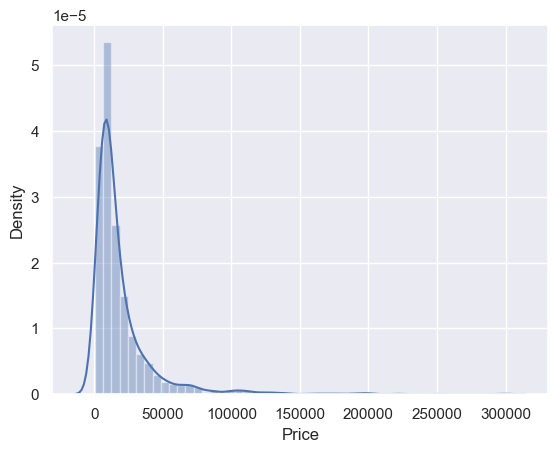

In [13]:
sns.distplot(data_scaled['Price'])

The graph shows left skewness and also many outliers so we have to perform logrithm transformation and drop some of the outliers

In [14]:
data_val = data_scaled['Price'].quantile(0.99)
data_scaled = data_scaled[data_scaled['Price'] < data_val]
data_scaled

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,1991,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.0,427,2.9,1999,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.0,358,5.0,2003,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23000.0,240,4.2,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.0,120,2.0,2011,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,17900.0,35,1.6,2014,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4340,125000.0,9,3.0,2014,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4341,6500.0,1,3.5,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4342,8000.0,194,2.0,1985,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.2.1 Logrithmic Transformation

In [15]:
data_scaled['Price'] = np.log(data_scaled['Price'])
data_scaled

C:\Users\HP\AppData\Local\Temp\ipykernel_5464\1800379626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_scaled['Price'] = np.log(data_scaled['Price'])


,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.0,1991,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,427,2.9,1999,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,358,5.0,2003,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,240,4.2,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,120,2.0,2011,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,9.792556,35,1.6,2014,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4340,11.736069,9,3.0,2014,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4341,8.779557,1,3.5,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4342,8.987197,194,2.0,1985,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


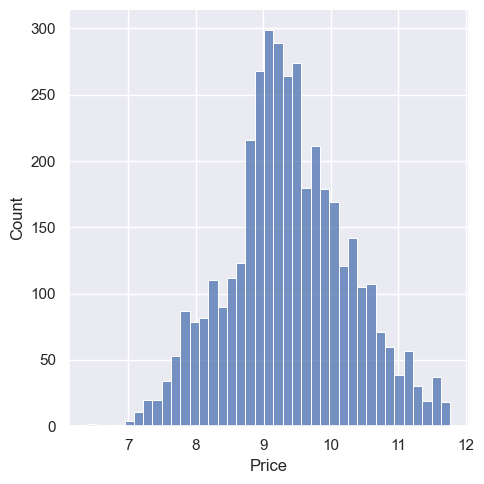

In [16]:
sns.displot(data_scaled['Price'])

C:\Users\HP\AppData\Local\Temp\ipykernel_5464\1023307840.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_scaled['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

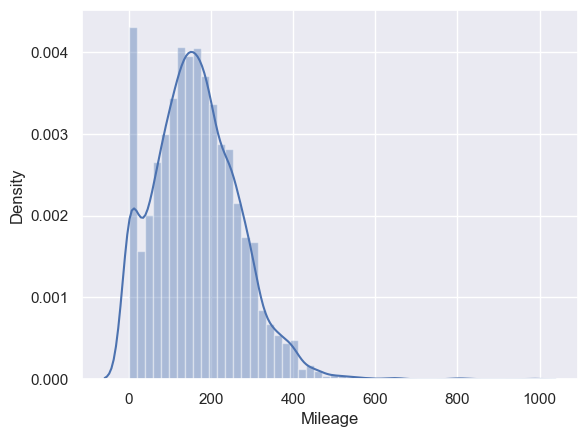

In [17]:
sns.distplot(data_scaled['Mileage'])

In [18]:
data_val = data_scaled['Mileage'].quantile(0.99)
data_scaled = data_scaled[data_scaled['Mileage'] < data_val]
data_scaled

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.0,1991,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,427,2.9,1999,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,358,5.0,2003,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,240,4.2,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,120,2.0,2011,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,9.792556,35,1.6,2014,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4340,11.736069,9,3.0,2014,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4341,8.779557,1,3.5,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4342,8.987197,194,2.0,1985,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\HP\AppData\Local\Temp\ipykernel_5464\1023307840.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_scaled['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

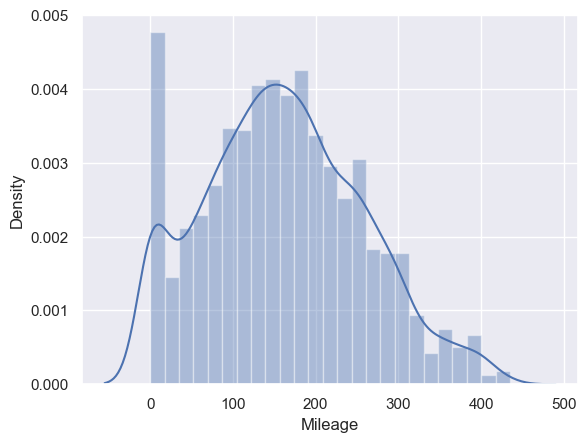

In [19]:
sns.distplot(data_scaled['Mileage'])

In [20]:
data_scaled = data_scaled[data_scaled['EngineV'] < 6.5]
data_scaled

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.0,1991,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,427,2.9,1999,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,358,5.0,2003,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,240,4.2,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,120,2.0,2011,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,9.792556,35,1.6,2014,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4340,11.736069,9,3.0,2014,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4341,8.779557,1,3.5,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4342,8.987197,194,2.0,1985,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\HP\AppData\Local\Temp\ipykernel_5464\2079697168.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_scaled['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

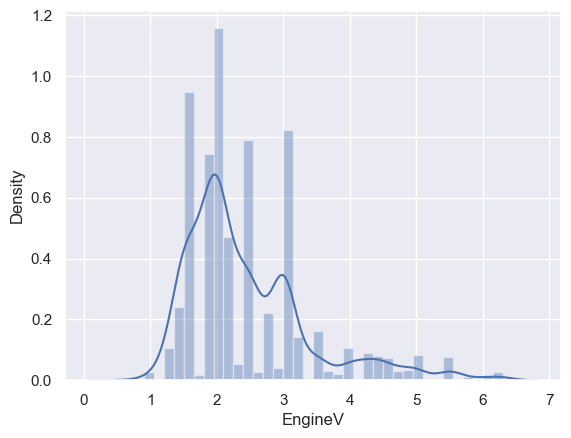

In [21]:
sns.distplot(data_scaled['EngineV'])

C:\Users\HP\AppData\Local\Temp\ipykernel_5464\3877212648.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_scaled['Year'])


<Axes: xlabel='Year', ylabel='Density'>

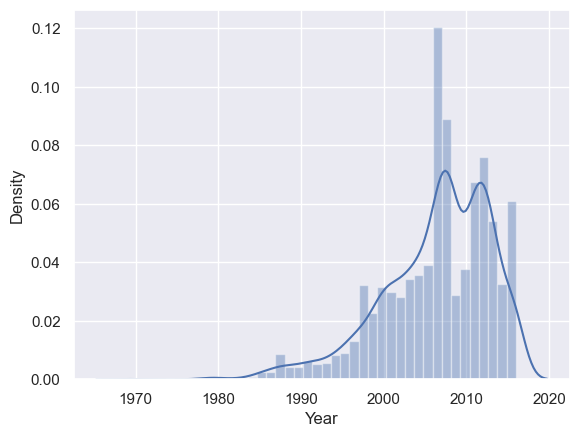

In [22]:
sns.distplot(data_scaled['Year'])

In [23]:
data_val = data_scaled['Year'].quantile(0.01)
data_scaled = data_scaled[data_scaled['Year'] > data_val]
data_scaled

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.0,1991,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,427,2.9,1999,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,358,5.0,2003,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,240,4.2,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,120,2.0,2011,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,9.350102,163,2.5,2008,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4339,9.792556,35,1.6,2014,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4340,11.736069,9,3.0,2014,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4341,8.779557,1,3.5,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\HP\AppData\Local\Temp\ipykernel_5464\3877212648.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_scaled['Year'])


<Axes: xlabel='Year', ylabel='Density'>

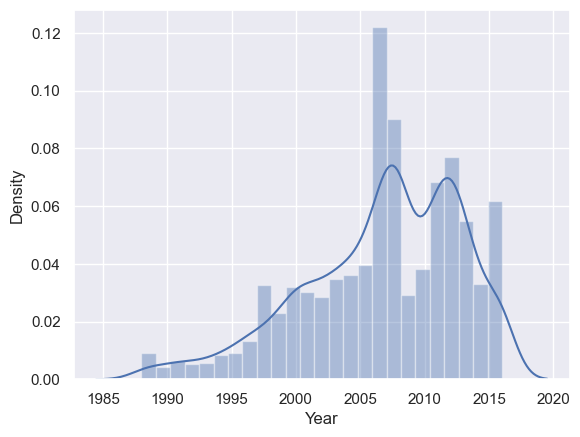

In [24]:
sns.distplot(data_scaled['Year'])

In [25]:
data_scaled

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.0,1991,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,427,2.9,1999,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,358,5.0,2003,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,240,4.2,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,120,2.0,2011,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,9.350102,163,2.5,2008,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4339,9.792556,35,1.6,2014,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4340,11.736069,9,3.0,2014,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4341,8.779557,1,3.5,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.3 Numerical Features vs. Target Variable
This helps you see if there are any clear linear relationships.

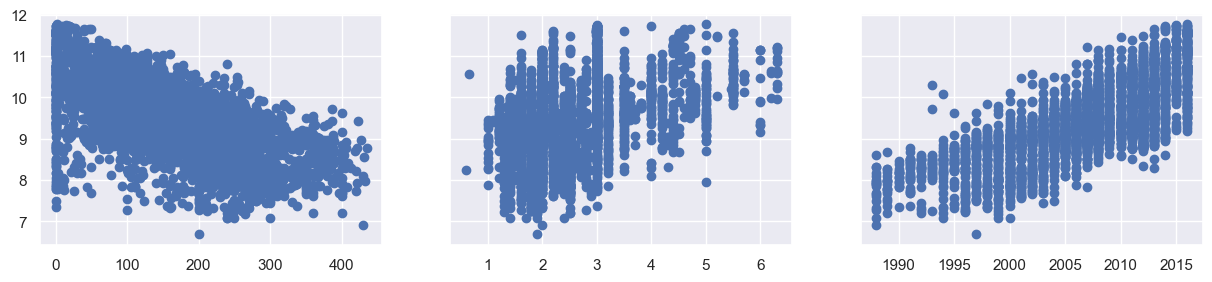

In [26]:
f , [ax1, ax2, ax3] = plt.subplots(1, 3, sharey = True, figsize = (15, 3))
ax1.scatter(data_scaled['Mileage'], data_scaled['Price'])
ax2.scatter(data_scaled['EngineV'], data_scaled['Price'])
ax3.scatter(data_scaled['Year'], data_scaled['Price'])
plt.show()

### 2.4 Check for Multicollinearity

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [28]:
vif

,VIF,features
0,3.481307,Mileage
1,3.748134,Year
2,1.314535,EngineV


In [29]:
data_scaled

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.0,1991,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,427,2.9,1999,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,358,5.0,2003,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,240,4.2,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,120,2.0,2011,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,9.350102,163,2.5,2008,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4339,9.792556,35,1.6,2014,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4340,11.736069,9,3.0,2014,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4341,8.779557,1,3.5,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Regression Analysis

### 3.1 Splitting data into feature and target

In [48]:
features = data_scaled.drop(['Price', 'Year'], axis=1)
target = data_scaled['Price']
target

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
4338     9.350102
4339     9.792556
4340    11.736069
4341     8.779557
4344     9.510445
Name: Price, Length: 3867, dtype: float64

### 3.2 Feature scaling and feature selection

In [49]:
from sklearn.feature_selection import f_regression

# Scale features while keeping DataFrame structure
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Perform feature selection
f_value, p_value = f_regression(scaled_features_df, target)
significance_level = 0.05
selected_features = scaled_features_df.columns[p_value < significance_level]

# Select the scaled features based on the feature selection
selected_scaled_features = scaled_features_df[selected_features]
selected_scaled_features

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,...,Model_Venza,Model_Viano,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris
0,1.217908,-0.474525,2.279718,-0.492554,-0.291054,-0.354632,-0.384472,-0.529988,-0.264586,-0.325277,...,-0.042585,-0.035981,-0.203656,-0.053411,-0.053411,-0.17111,-0.042585,-0.098288,-0.027864,-0.060279
1,2.786602,0.473599,-0.438651,2.030235,-0.291054,-0.354632,-0.384472,-0.529988,-0.264586,-0.325277,...,-0.042585,-0.035981,-0.203656,-0.053411,-0.053411,-0.17111,-0.042585,-0.098288,-0.027864,-0.060279
2,2.065003,2.685886,-0.438651,2.030235,-0.291054,-0.354632,-0.384472,-0.529988,-0.264586,-0.325277,...,-0.042585,-0.035981,-0.203656,-0.053411,-0.053411,-0.17111,-0.042585,-0.098288,-0.027864,-0.060279
3,0.830963,1.843110,-0.438651,-0.492554,-0.291054,-0.354632,-0.384472,-0.529988,-0.264586,-0.325277,...,-0.042585,-0.035981,-0.203656,-0.053411,-0.053411,-0.17111,-0.042585,-0.098288,-0.027864,-0.060279
4,-0.423992,-0.474525,-0.438651,-0.492554,-0.291054,-0.354632,2.600973,-0.529988,-0.264586,-0.325277,...,-0.042585,-0.035981,-0.203656,-0.053411,-0.053411,-0.17111,-0.042585,-0.098288,-0.027864,-0.060279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,0.025700,0.052210,-0.438651,-0.492554,-0.291054,-0.354632,-0.384472,1.886834,-0.264586,-0.325277,...,-0.042585,-0.035981,-0.203656,-0.053411,-0.053411,-0.17111,-0.042585,-0.098288,-0.027864,-0.060279
3863,-1.312919,-0.895913,-0.438651,-0.492554,-0.291054,-0.354632,2.600973,-0.529988,-0.264586,-0.325277,...,-0.042585,-0.035981,-0.203656,-0.053411,-0.053411,-0.17111,-0.042585,-0.098288,-0.027864,-0.060279
3864,-1.584826,0.578946,-0.438651,2.030235,-0.291054,-0.354632,-0.384472,-0.529988,-0.264586,-0.325277,...,-0.042585,-0.035981,-0.203656,-0.053411,-0.053411,-0.17111,-0.042585,-0.098288,-0.027864,-0.060279
3865,-1.668490,1.105681,2.279718,-0.492554,-0.291054,-0.354632,-0.384472,-0.529988,-0.264586,-0.325277,...,-0.042585,-0.035981,-0.203656,-0.053411,-0.053411,-0.17111,-0.042585,-0.098288,-0.027864,-0.060279


### 3.3 Splitting data into testing and training sets 

In [50]:
x_train, x_test, y_train, y_test = train_test_split(selected_scaled_features, target, test_size = 0.2, random_state = 365)

### 3.4 Create Regression model

In [51]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_hat = reg.predict(x_train)

Text(0.5, 0, 'Target Prices')

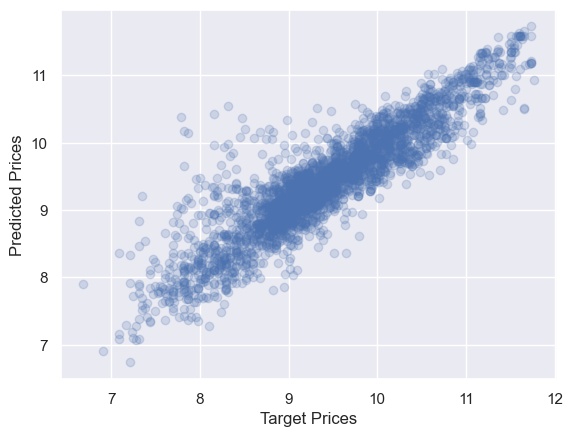

In [52]:
plt.scatter(y_train, y_hat, alpha = 0.2)
plt.ylabel('Predicted Prices')
plt.xlabel('Target Prices')


### 3.5 Residual model 

<Axes: xlabel='Price', ylabel='Density'>

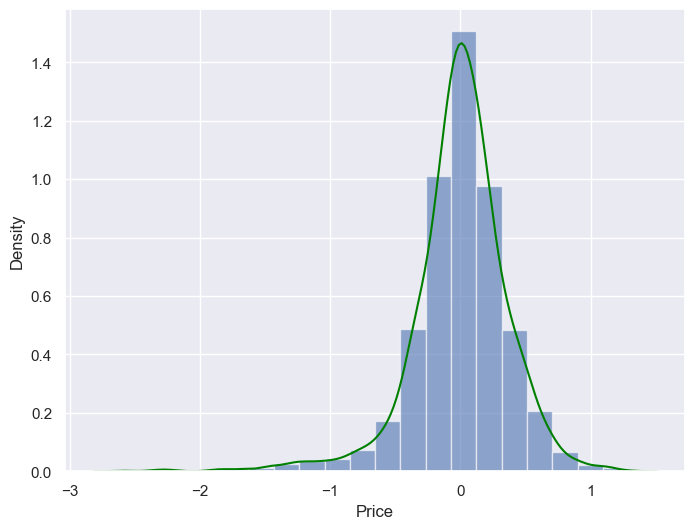

In [53]:
# Residual Plot = Difference between target and prediction
residuals = y_train - y_hat

plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Create a histogram of residuals
plt.hist(residuals, bins=20, density=True, alpha=0.6, label='Histogram')

# Add a kernel density estimate (KDE) line plot
sns.kdeplot(residuals, color='green', label='KDE')

### 3.6 Testing

In [54]:
reg = LinearRegression()
reg.fit(x_test, y_test)
y_hat = reg.predict(x_test)

Text(0.5, 0, 'Target Prices')

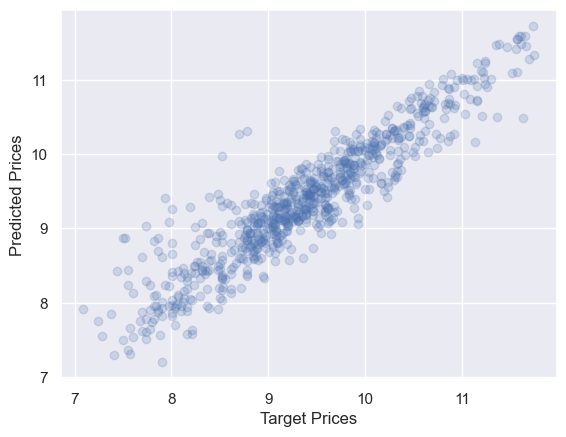

In [55]:
plt.scatter(y_test, y_hat, alpha = 0.2)
plt.ylabel('Predicted Prices')
plt.xlabel('Target Prices')

In [56]:
predict_value = pd.DataFrame(np.exp(y_hat), columns = ['Predicted_price'])
predict_value['Target'] = np.exp(y_test)
predict_value

,Predicted_price,Target
0,8355.393493,NaN
1,3760.472166,7900.0
2,2403.614690,NaN
3,7408.231196,NaN
4,9055.588774,NaN
...,...,...
769,30096.733885,NaN
770,8818.660301,NaN
771,15573.410946,NaN
772,25726.411744,NaN


In [57]:
y_test = y_test.reset_index(drop = True)
predict_value.drop('Target', axis = 1, inplace = True)
predict_value['Target'] = np.exp(y_test)
predict_value

,Predicted_price,Target
0,8355.393493,2300.0
1,3760.472166,2800.0
2,2403.614690,2500.0
3,7408.231196,6400.0
4,9055.588774,9150.0
...,...,...
769,30096.733885,29500.0
770,8818.660301,9600.0
771,15573.410946,18300.0
772,25726.411744,68500.0


In [60]:
predict_value['Residual'] =  predict_value['Target'] - predict_value['Predicted_price'] 
predict_value

,Predicted_price,Target,Residual
0,8355.393493,2300.0,-6055.393493
1,3760.472166,2800.0,-960.472166
2,2403.614690,2500.0,96.385310
3,7408.231196,6400.0,-1008.231196
4,9055.588774,9150.0,94.411226
...,...,...,...
769,30096.733885,29500.0,-596.733885
770,8818.660301,9600.0,781.339699
771,15573.410946,18300.0,2726.589054
772,25726.411744,68500.0,42773.588256


In [62]:
predict_value['Difference%'] = np.absolute(predict_value['Residual']/predict_value['Target']* 100)
predict_value

,Predicted_price,Target,Residual,Difference%
0,8355.393493,2300.0,-6055.393493,263.277978
1,3760.472166,2800.0,-960.472166,34.302577
2,2403.614690,2500.0,96.385310,3.855412
3,7408.231196,6400.0,-1008.231196,15.753612
4,9055.588774,9150.0,94.411226,1.031817
...,...,...,...,...
769,30096.733885,29500.0,-596.733885,2.022827
770,8818.660301,9600.0,781.339699,8.138955
771,15573.410946,18300.0,2726.589054,14.899394
772,25726.411744,68500.0,42773.588256,62.443195


In [63]:
predict_value.sort_values(by = 'Difference%')

,Predicted_price,Target,Residual,Difference%
162,1798.576822,1800.0,1.423178,0.079065
137,107832.365601,107999.0,166.634399,0.154293
610,8185.163214,8200.0,14.836786,0.180936
506,3206.505557,3200.0,-6.505557,0.203299
698,30568.706039,30500.0,-68.706039,0.225266
...,...,...,...,...
532,7132.801915,1800.0,-5332.801915,296.266773
639,21303.713042,4999.0,-16304.713042,326.159493
182,12255.833715,2800.0,-9455.833715,337.708347
451,30187.570533,6500.0,-23687.570533,364.424162


Text(0.5, 0, 'Target Prices')

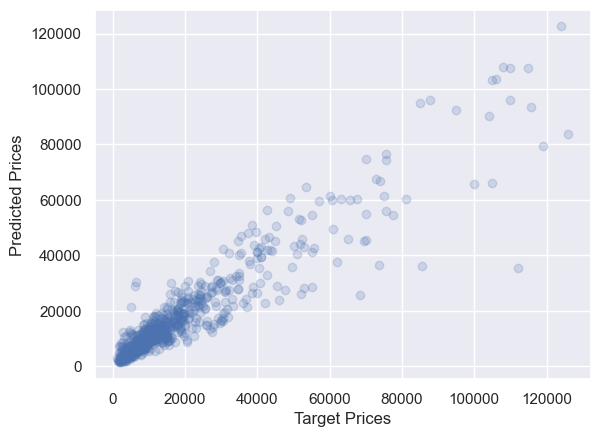

In [64]:
plt.scatter(predict_value['Target'], predict_value['Predicted_price'], alpha = 0.2)
plt.ylabel('Predicted Prices')
plt.xlabel('Target Prices')